In [76]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')

from matplotlib.pyplot import imshow

In [78]:
import model
from model.captcha_cracker import CaptchaCracker


msoftmax_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/simpledataset_nvocab/msoftmax'
#lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset_nvocab/lstm_complexMix'
lstm_model_params_prefix ='/home/geetika/captcha/dataset_ssd_1T/website_data_nvocab/lstm_website'

cracker = model.captcha_cracker.CaptchaCracker(
    lstm_model_params_prefix, includeCapital=False, multi_chars=True,
    num_softmaxes=None, rescale_in_preprocessing=True)

import os
from PIL import Image
import numpy
import random

#image_dir = '/home/geetika/captcha/dataset_ssd/simpledataset'
#image_dir = '/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset/'
image_dir = '/home/geetika/captcha/dataset_ssd_1T/new_dataset_website/'

import model
files = os.listdir(image_dir)

The output file is available at /home/geetika/model_graph.png


/home/geetika/captcha/dataset_ssd_1T/new_dataset_website/1617149_292a6.jpg
292a6
predicted_char= 2
[('2', 0.99998909), ('7', 8.2194701e-06), ('3', 1.8169059e-06), ('1', 3.9482023e-07), ('a', 2.4418972e-07), ('9', 1.1025888e-07), ('x', 9.871146e-08), ('f', 2.1134774e-09), ('c', 1.9950095e-09), ('5', 3.7181774e-10)]
predicted_char= 9
[('9', 0.9999845), ('5', 6.4918149e-06), ('0', 5.6401541e-06), ('2', 2.6415137e-06), ('3', 4.8725445e-07), ('8', 1.1892543e-07), ('7', 5.7390352e-08), ('d', 2.6577588e-08), ('6', 1.6695747e-08), ('f', 1.0006673e-08)]
predicted_char= 2
[('2', 0.99998981), ('3', 6.8744048e-06), ('7', 1.8116835e-06), ('a', 1.0816643e-06), ('9', 2.6985006e-07), ('1', 5.8071478e-08), ('8', 3.8711548e-08), ('5', 2.0100341e-08), ('c', 1.7379442e-08), ('f', 1.2007888e-08)]
predicted_char= a
[('a', 0.99988955), ('e', 6.2376777e-05), ('2', 2.0523141e-05), ('d', 1.4654168e-05), ('b', 5.6196036e-06), ('0', 3.259898e-06), ('c', 2.7952156e-06), ('3', 1.0293179e-06), ('1', 7.7503422e-08), 

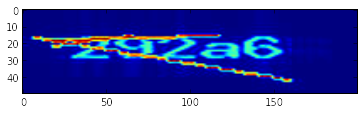

In [87]:
file_path = os.path.join(image_dir, random.choice(files))
#file_path = "/home/geetika/cap.jpg"
print file_path

# Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))


predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)

print "".join(x for x in predicted_chars)

for i in range(len(predicted_chars)):
    print 'predicted_char= {0}'.format(predicted_chars[i])
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]